# Evaluating Clustering Algorithms
**Author**: Mohammed A. Shehab

## Introduction
This notebook provides an overview of three metrics used to evaluate clustering algorithms:

1. Mean Squared Error (MSE): Measures the average squared distance between data points and their cluster centroids.
2. Mean Absolute Error (MAE):Measures the average absolute distance between data points and their cluster centroids.
3. Silhouette Score:Evaluates the quality of clustering by comparing intra-cluster cohesion and inter-cluster separation.
Each metric has its strengths and weaknesses depending on the dataset and clustering context.
---

### **1. Mean Squared Error (MSE)**

#### **Definition**

MSE calculates the squared differences between each data point and its cluster centroid, then averages them over all data points.

#### **Formula**

$
MSE = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x}_c)^2
$

Where:
- $x_i$: A data point.
- $\bar{x}_c$: The centroid of the cluster to which \(x_i\) belongs.
- $n$: Total number of data points.

#### **Advantages**
- Provides a quantitative measure of intra-cluster variance.
- Sensitive to outliers, which can highlight poorly clustered regions.

#### **Disadvantages**
- **Over-sensitivity to outliers:**
  - Squared differences exaggerate the impact of distant points.
- **Assumption of spherical clusters:**
  - Performs poorly on non-spherical or irregular clusters.

#### **Best Used For**
- Datasets with relatively uniform, spherical clusters.
- Situations where detecting large deviations (outliers) is important.

#### **Not Suitable For**
- Datasets with noise or non-spherical clusters.
- Scenarios where outliers distort the clustering quality.

---

### **2. Mean Absolute Error (MAE)**

#### **Definition**

MAE calculates the average absolute distance between each data point and its cluster centroid.

#### **Formula**

$
MAE = \frac{1}{n} \sum_{i=1}^n |x_i - \bar{x}_c|
$

#### **Advantages**
- Less sensitive to outliers compared to MSE.
- Easy to interpret as it measures the absolute deviation.

#### **Disadvantages**
- Less sensitive to significant clustering errors due to its linear nature.
- Does not account for inter-cluster separation.

#### **Best Used For**
- Datasets with moderate noise or outliers.
- Clusters with varied shapes where robustness is required.

#### **Not Suitable For**
- Cases where outliers need to be emphasized.
- Situations where inter-cluster separation is crucial.

---

### **3. Silhouette Score**

#### **Definition**

Silhouette Score evaluates how similar a data point is to its own cluster compared to other clusters. It considers both intra-cluster cohesion and inter-cluster separation.

#### **Formula**

$
S = \frac{b - a}{\max(a, b)}
$

Where:
- $a$: Average intra-cluster distance.
- $b$: Average distance to the nearest cluster (inter-cluster distance).

#### **Advantages**
- Captures both cohesion and separation in a single metric.
- Scales well for non-spherical and irregular cluster shapes.

#### **Disadvantages**
- Computationally expensive for large datasets.
- Requires distance computation between all points, which can be intensive.

#### **Best Used For**
- Datasets with varied cluster shapes and sizes.
- Applications requiring a balance between intra-cluster cohesion and inter-cluster separation.

#### **Not Suitable For**
- Large datasets due to computational complexity.
- Situations where only intra-cluster variance or cohesion is relevant.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, silhouette_score

## Generate synthetic data


In [5]:
data, labels_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# Add random outliers to the dataset
np.random.seed(42)
outliers = np.random.uniform(low=-5, high=8, size=(20, 2))  # 20 random outliers
data_with_outliers = np.vstack([data, outliers])

## Visualize the dataset with outliers


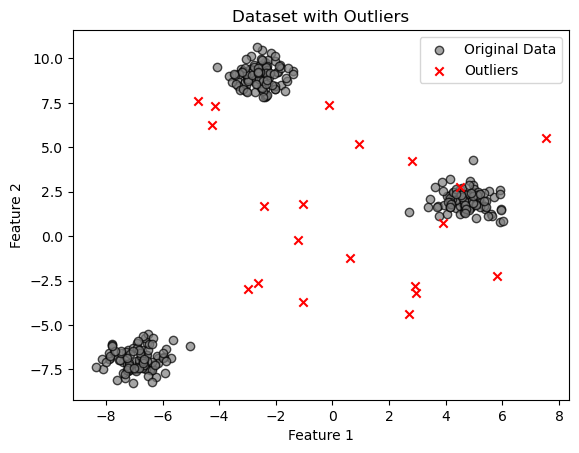

In [7]:
plt.scatter(data[:, 0], data[:, 1], c='gray', marker='o', edgecolor='k', alpha=0.7, label="Original Data")
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label="Outliers")
plt.title("Dataset with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## KMeans Clustering
### Note: as a task, please use another clustering algorithm that you learned from class today

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_with_outliers)
labels_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## Visualize the clustered dataset

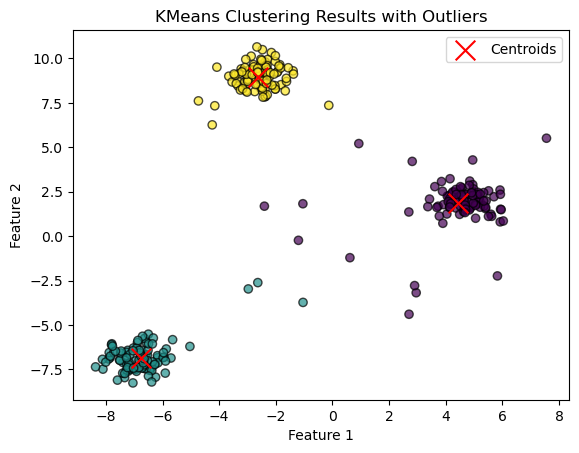

In [11]:
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], c=labels_pred, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("KMeans Clustering Results with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Calculate Metrics

In [13]:
mse_with_outliers = mean_squared_error(data_with_outliers, kmeans.cluster_centers_[labels_pred])
print(f"Mean Squared Error (MSE) with Outliers: {mse_with_outliers:.2f}")


mae_with_outliers = mean_absolute_error(data_with_outliers, kmeans.cluster_centers_[labels_pred])
print(f"Mean Absolute Error (MAE) with Outliers: {mae_with_outliers:.2f}")


sil_score_with_outliers = silhouette_score(data_with_outliers, labels_pred)
print(f"Silhouette Score with Outliers: {sil_score_with_outliers:.2f}")

Mean Squared Error (MSE) with Outliers: 1.03
Mean Absolute Error (MAE) with Outliers: 0.63
Silhouette Score with Outliers: 0.86


## Visualize metrics with and without outliers


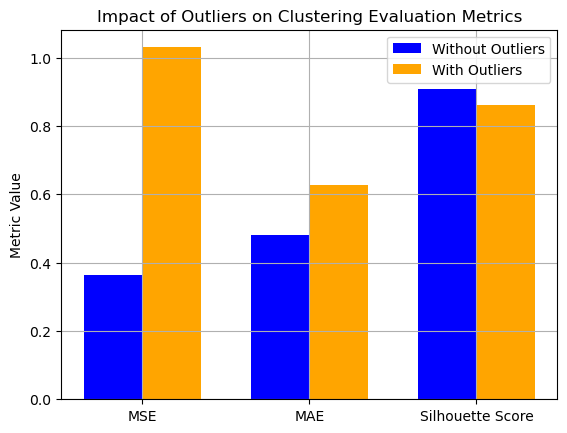

In [15]:
metrics = ['MSE', 'MAE', 'Silhouette Score']
values_without_outliers = [
    mean_squared_error(data, kmeans.cluster_centers_[kmeans.predict(data)]),
    mean_absolute_error(data, kmeans.cluster_centers_[kmeans.predict(data)]),
    silhouette_score(data, kmeans.predict(data))
]
values_with_outliers = [mse_with_outliers, mae_with_outliers, sil_score_with_outliers]

bar_width = 0.35
x = np.arange(len(metrics))

plt.bar(x - bar_width/2, values_without_outliers, bar_width, label='Without Outliers', color='blue')
plt.bar(x + bar_width/2, values_with_outliers, bar_width, label='With Outliers', color='orange')

plt.title("Impact of Outliers on Clustering Evaluation Metrics")
plt.xticks(x, metrics)
plt.ylabel("Metric Value")
plt.legend()
plt.grid(axis="both")
plt.show()

## Explanation

1. **Dataset with Outliers Plot:**

* Gray points represent the original dataset.
* Red "x" points represent added outliers.
* Demonstrates how outliers are distributed far from the main clusters.

2. **Clustered Dataset Plot:**

* Shows how KMeans clusters the data when outliers are present, often misclassifying outliers or distorting cluster centroids.

3. **Evaluation Metrics:**

* MSE: Significantly higher with outliers due to squared distances magnifying the impact of outliers.
* MAE: Higher with outliers but less dramatic compared to MSE due to its linear nature.
* Silhouette Score: Typically lower with outliers as they degrade cluster cohesion and separation.

4. **Bar Chart Comparison:**

* Shows side-by-side comparison of metrics with and without outliers to highlight their impact.

## Elbow Method

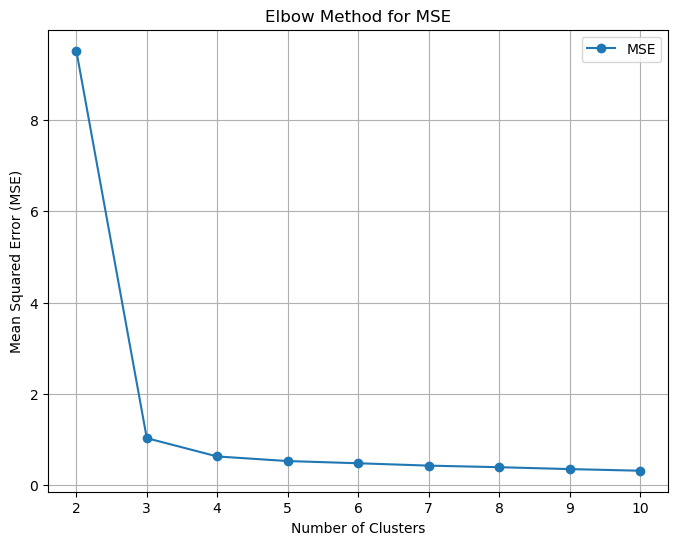

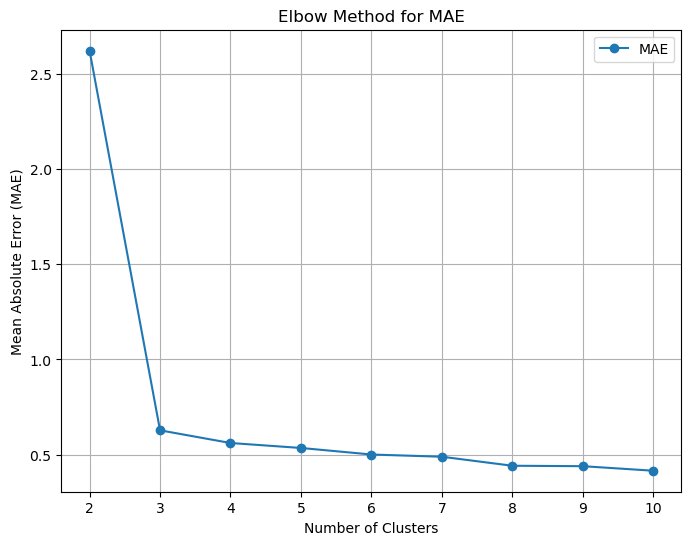

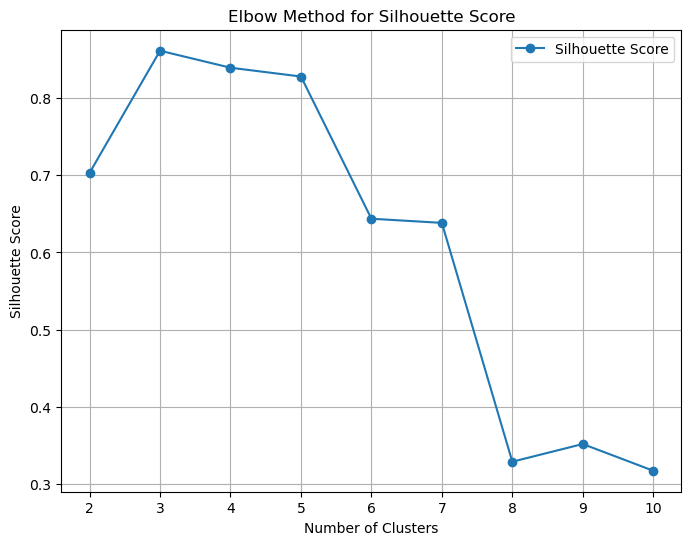

In [32]:
import os
import warnings
# Range of cluster counts to evaluate
cluster_range = range(2, 11)
# Suppress specific warnings
os.environ["OMP_NUM_THREADS"] = "2"
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# Store metric values for each number of clusters
mse_values = []
mae_values = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_with_outliers)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Calculate metrics
    mse_values.append(mean_squared_error(data_with_outliers, centroids[labels]))
    mae_values.append(mean_absolute_error(data_with_outliers, centroids[labels]))
    silhouette_scores.append(silhouette_score(data_with_outliers, labels))

# Plot Elbow Method for MSE
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, mse_values, marker='o', linestyle='-', label="MSE")
plt.title("Elbow Method for MSE")
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()
plt.legend()
plt.show()

# Plot Elbow Method for MAE
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, mae_values, marker='o', linestyle='-', label="MAE")
plt.title("Elbow Method for MAE")
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid()
plt.legend()
plt.show()

# Plot Elbow Method for Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', label="Silhouette Score")
plt.title("Elbow Method for Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.legend()
plt.show()
